# import libraries

In [1]:
import pandas as pd
import time
import os
import sys
# Define the relative path to the parent directory
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
# Add the parent directory to sys.path
sys.path.append(parent_dir)
import util

print(parent_dir)
# Now you can import the modules
available_tissues = ["brain", "kidney", "bladder","uterus","cervix_ectocervix","fallopian_tube"]
# Choose your tissues from available_tissues (replace with your choices)
tissue1 = "cervix_ectocervix"
tissue2 = "fallopian_tube"



C:\Users\z004kuwf\Master_thesis\TPM


# if a user doens't have gene expression data

# get sample id

In [ ]:

util.extract_and_save_gtex_columns("gene_reads_2017-06-05_v8_cervix_ectocervix.gct.gz", f"{tissue1}_samples.txt")
util.extract_and_save_gtex_columns("gene_reads_2017-06-05_v8_fallopian_tube.gct.gz",f"{tissue2}_samples.txt")

## read gene/transcript data


In [4]:
transcript_gz_file_path = os.path.join(parent_dir, "GTEx_Analysis_2017-06-05_v8_RSEMv1.3.0_transcript_tpm.gct.gz")

sample_tissue1 = f"{tissue1}_samples.txt"
sample_tissue2 = f"{tissue2}_samples.txt"

output_file_path_tissue1 = f"transcript_{tissue1}.txt"
output_file_path_tissue2 = f"transcript_{tissue2}.txt"

# Read and process transcript data
util.read_transcript(transcript_gz_file_path, sample_tissue1, output_file_path_tissue1)
util.read_transcript(transcript_gz_file_path, sample_tissue2, output_file_path_tissue2)
gene_gz_file_path = os.path.join(parent_dir, "GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_tpm.gct.gz")

output_file_path_tissue1 = f"gene_{tissue1}.txt"
output_file_path_tissue2 = f"gene_{tissue2}.txt"

# Read and process gene data
util.read_gene(gene_gz_file_path, sample_tissue1, output_file_path_tissue1)
util.read_gene(gene_gz_file_path, sample_tissue2, output_file_path_tissue2)

# protein-coding /low expression filtering on transciprt/gene data

In [2]:
# Genes or transcripts were removed if they had zero read counts in more than 1/50 of the total number of samples 
# also exhibited fewer than 5 read counts.
start_time = time.time()
util.preprocessing_data(tissue1, available_tissues,1/50,5)
end_time = time.time()
execution_time = end_time - start_time
print("Execution Time:", execution_time, "seconds")

Execution Time: 470.6986904144287 seconds


In [3]:
# Genes or transcripts were removed if they had zero read counts in more than 1/50 of the total number of samples 
# also exhibited fewer than 5 read counts.
start_time = time.time()
# Perform tissue analysis
util.preprocessing_data(tissue2, available_tissues,1/50,5)
end_time = time.time()
execution_time = end_time - start_time
print("Execution Time:", execution_time, "seconds")

Execution Time: 271.64400911331177 seconds


# GRNboost2

In [4]:
start_time = time.time()
util.run_grnboost(tissue1)
end_time = time.time()
execution_time = end_time - start_time
print("Execution Time:", execution_time, "seconds")

C:\Users\z004kuwf\Anaconda3\lib\site-packages\distributed\node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 64938 instead
  warnings.warn(
2024-06-27 16:36:11,711 - distributed.nanny - WARNING - Worker process still alive after 3.199986267089844 seconds, killing
2024-06-27 16:36:11,816 - distributed.nanny - WARNING - Worker process still alive after 3.1999969482421875 seconds, killing
2024-06-27 16:36:11,837 - distributed.nanny - WARNING - Worker process still alive after 3.199997253417969 seconds, killing
2024-06-27 16:36:11,843 - distributed.nanny - WARNING - Worker process still alive after 3.19999740600586 seconds, killing


Execution Time: 830.5201563835144 seconds


In [5]:

start_time = time.time()
util.run_grnboost(tissue2)
end_time = time.time()
execution_time = end_time - start_time
print("Execution Time:", execution_time, "seconds")

C:\Users\z004kuwf\Anaconda3\lib\site-packages\distributed\node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 52840 instead
  warnings.warn(
C:\Users\z004kuwf\Anaconda3\lib\site-packages\distributed\client.py:3163: UserWarning: Sending large graph of size 10.19 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
2024-06-11 00:12:03,620 - distributed.nanny - WARNING - Worker process still alive after 3.199997711181641 seconds, killing


Execution Time: 1171.761418581009 seconds


# Construcing a GRN (gene+isoform)

In [15]:
start_time = time.time()
network_tissue1=util.grn_mapping(tissue1)
end_time = time.time()
execution_time = end_time - start_time
print("Execution Time:", execution_time, "seconds")

Execution Time: 179.87850904464722 seconds


In [16]:
start_time = time.time()
network_tissue2=util.grn_mapping(tissue2)
end_time = time.time()
execution_time = end_time - start_time
print("Execution Time:", execution_time, "seconds")

Execution Time: 239.48031306266785 seconds


# differential expression analysis

## creating meta data

In [3]:

util.meta_data(tissue1,tissue2)

## two tissues combined gene expression data

In [7]:
combined_expression_df = util.gene_expression_sum(tissue1, tissue2)
print(combined_expression_df)

                 GTEX-N7MT-0826-SM-EV794  GTEX-P78B-2326-SM-EZ6KO  \
Gene_ID                                                             
ENSG00000000003                    33.30                    47.82   
ENSG00000000419                    69.28                    74.14   
ENSG00000000457                    12.69                    10.45   
ENSG00000001036                    33.38                    52.27   
ENSG00000001084                    13.55                    10.20   
...                                  ...                      ...   
ENST00000636157                     0.00                     0.00   
ENST00000636580                     0.00                     0.00   
ENST00000637624                     0.00                     0.00   
ENST00000638170                     0.00                     0.00   
ENST00000638786                     0.00                     0.00   

                 GTEX-Q2AG-2326-SM-EZ6KY  GTEX-S32W-1526-SM-4AD6Z  \
Gene_ID                          

## run differential_expression.R

# aggregation data with differential gene analysis results

In [2]:
tissue1_df = pd.read_csv(f'{tissue1}_df.csv')
tissue2_df = pd.read_csv(f'{tissue2}_df.csv')
diff_expression_df=f'../differential_expression_analysis/{tissue1}_{tissue2}_significant_results.csv'

start_time = time.time()
# common TFs based merge
TF_df=util.aggregation("TF_gene", tissue1, tissue2, tissue1_df, tissue2_df, diff_expression_df)
print(TF_df)

# common targets based merge
target_df=util.aggregation("target_gene",tissue1, tissue2, tissue1_df, tissue2_df,diff_expression_df)
print(target_df)

# Concat dataframes
combined_table = pd.concat([TF_df, target_df], ignore_index=True)

end_time = time.time()
execution_time = end_time - start_time
print("Execution Time:", execution_time, "seconds")

             TF_gene tissue_cervix_ectocervix  \
0    ENSG00000101665        cervix_ectocervix   
1    ENSG00000127616        cervix_ectocervix   
2    ENSG00000175550        cervix_ectocervix   
3    ENSG00000166886        cervix_ectocervix   
4    ENSG00000135111        cervix_ectocervix   
..               ...                      ...   
338  ENSG00000135457        cervix_ectocervix   
339  ENSG00000111145        cervix_ectocervix   
340  ENSG00000132109        cervix_ectocervix   
341  ENSG00000204859        cervix_ectocervix   
342  ENSG00000143390        cervix_ectocervix   

    TF_transcript_id_cervix_ectocervix target_gene_cervix_ectocervix  \
0                      ENST00000545051               ENSG00000115761   
1                      ENST00000586921               ENSG00000140859   
2                      ENST00000532933               ENSG00000213221   
3                      ENST00000300131               ENSG00000083444   
4                      ENST00000257566             

## Tissue specific isoform %

In [3]:
start_time = time.time()

util.isoform_gene_expression_data("cervix_ectocervix_filtered_tr.txt", "cervix_ectocervix_samples.txt",tissue1)
util.isoform_gene_expression_data("fallopian_tube_filtered_tr.txt", "fallopian_tube_samples.txt",tissue2)
grouped_table=util.isoform(tissue1, tissue2, f'{tissue1}_expression.csv', f'{tissue2}_expression.csv')
isoform_table=util.merge_grn_with_percentages(combined_table,grouped_table, tissue1, tissue2)
util.map_names(isoform_table, "gene_mapping.csv", "transcript_mapping.csv", tissue1, tissue2)

end_time = time.time()
execution_time = end_time - start_time
print("Execution Time:", execution_time, "seconds")

Execution Time: 22.722179174423218 seconds


# Gene set enrichment analysis prerank

2024-06-28 18:52:19,668 [INFO] Input gene rankings contains duplicated IDs
2024-06-28 18:52:19,690 [WARNING] Duplicated values found in preranked stats: 27.50% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-06-28 18:52:19,692 [INFO] Parsing data files for GSEA.............................
2024-06-28 18:52:19,692 [INFO] Enrichr library gene sets already downloaded in: C:\Users\z004kuwf\.cache/gseapy, use local file
2024-06-28 18:52:19,944 [INFO] 5365 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-06-28 18:52:19,944 [INFO] 0042 gene_sets used for further statistical testing.....
2024-06-28 18:52:19,944 [INFO] Start to run GSEA...Might take a while..................
2024-06-28 18:52:20,184 [INFO] Congratulations. GSEApy runs successfully................



      Name                                               Term        ES  \
0  prerank  Positive Regulation Of Multicellular Organisma... -0.540482   
1  prerank  Regulation Of Cell Population Proliferation (G...  -0.48734   
2  prerank  Negative Regulation Of Programmed Cell Death (... -0.557426   
3  prerank          Regulation Of Cell Migration (GO:0030334) -0.414988   
4  prerank  Negative Regulation Of Apoptotic Process (GO:0... -0.506992   
5  prerank  Negative Regulation Of Cellular Process (GO:00...  -0.40555   
6  prerank  Regulation Of Transcription By RNA Polymerase ... -0.378239   

        NES NOM p-val FDR q-val FWER p-val  Tag %  Gene %  \
0  -1.42783  0.061033       1.0      0.554    4/9  17.50%   
1 -1.368033   0.10771       1.0       0.67   5/11  20.83%   
2  -1.24211  0.172237       1.0      0.863    3/5  32.50%   
3 -1.215369  0.199773       1.0      0.886   7/13  39.17%   
4 -1.201548  0.217553       1.0      0.898    3/6  32.50%   
5 -1.190943  0.220225       1.0  

ValueError: Warning: No enrich terms when cutoff = 0.25

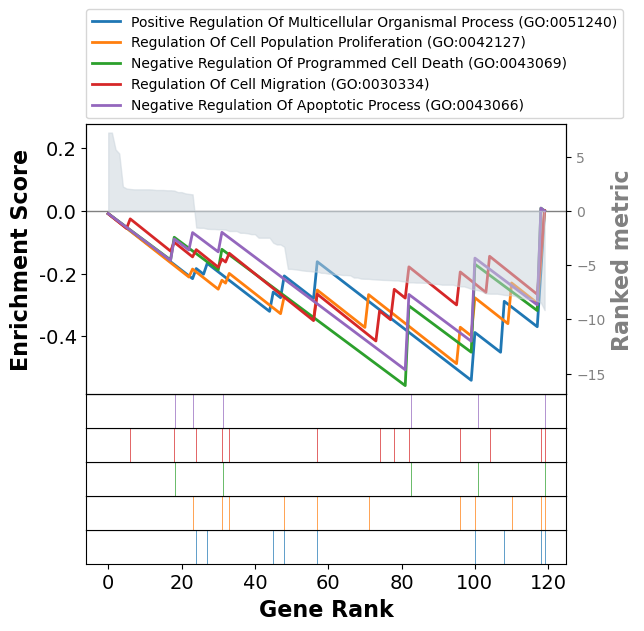

In [5]:
diff_expression_df=f'../differential_expression_analysis/{tissue1}_{tissue2}_significant_results.csv'
util.run_gsea(tissue1,diff_expression_df)

2024-06-27 18:03:28,528 [INFO] Input gene rankings contains duplicated IDs
2024-06-27 18:03:28,567 [WARNING] Duplicated values found in preranked stats: 19.28% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-06-27 18:03:28,574 [INFO] Parsing data files for GSEA.............................
2024-06-27 18:03:28,578 [INFO] Enrichr library gene sets already downloaded in: C:\Users\z004kuwf\.cache/gseapy, use local file
2024-06-27 18:03:28,739 [INFO] 5353 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-06-27 18:03:28,739 [INFO] 0054 gene_sets used for further statistical testing.....
2024-06-27 18:03:28,755 [INFO] Start to run GSEA...Might take a while..................
2024-06-27 18:03:28,939 [INFO] Congratulations. GSEApy runs successfully................



      Name                                               Term        ES  \
0  prerank             Regulation Of Cell Growth (GO:0001558)  0.699565   
1  prerank                     Heart Development (GO:0007507)  0.599507   
2  prerank        Circulatory System Development (GO:0072359)  0.599507   
3  prerank  Negative Regulation Of Apoptotic Process (GO:0...  0.537145   
4  prerank  Transforming Growth Factor Beta Receptor Signa... -0.514445   
5  prerank  Cellular Response To Transforming Growth Facto... -0.514445   
6  prerank  Transmembrane Receptor Protein Serine/Threonin... -0.514445   

        NES NOM p-val FDR q-val FWER p-val Tag %  Gene %  \
0  1.771255  0.017937  0.437988      0.293   4/5  15.36%   
1  1.716441  0.016575  0.222029      0.388   6/7  37.91%   
2  1.716441  0.016575  0.222029      0.388   6/7  37.91%   
3  1.526075  0.068641  0.507372      0.726   4/7  25.49%   
4 -1.400878   0.09622  0.642848      0.632   4/5  12.42%   
5 -1.400878   0.09622  0.642848      0.

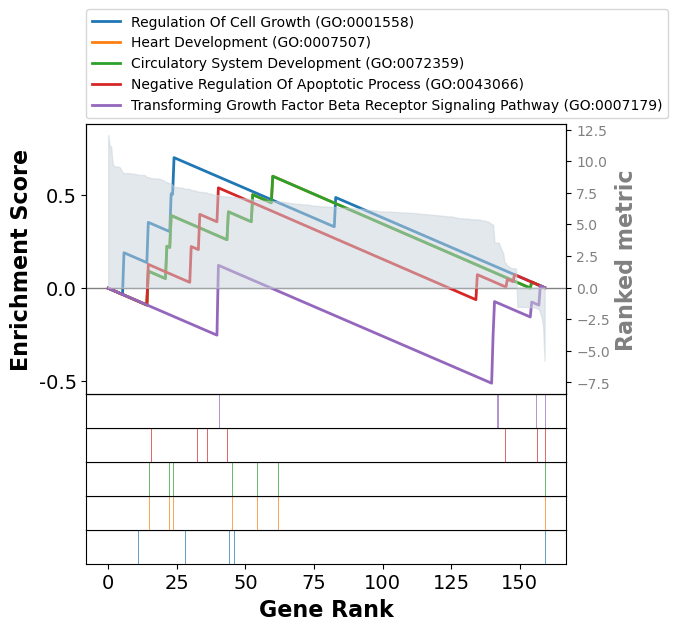

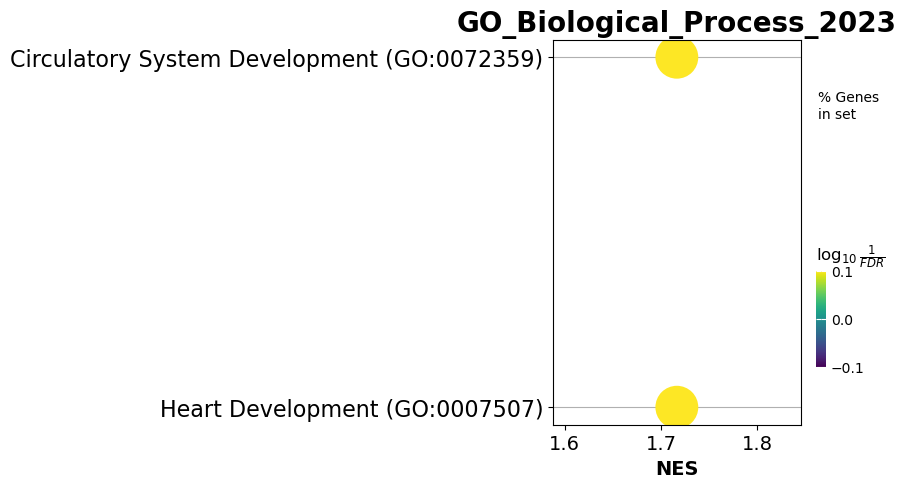

In [4]:
util.run_gsea(tissue2,diff_expression_df)